In [504]:
import numpy as np
import pandas as pd
import scipy.sparse as sparse
from scipy.stats import pearsonr
from scipy.sparse import linalg
import scipy.sparse
from scipy.linalg import solve, pinv
from scipy.signal import savgol_filter
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import rc
import matplotlib.gridspec as gridspec
from functools import partial
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from tqdm import tqdm
from tqdm.notebook import tqdm_notebook
import time
from numpy.fft import fft2, fftshift, ifft2
from numpy import diff
import math 
from scipy.integrate import solve_ivp
from scipy.optimize import curve_fit
from numpy.random import default_rng
from scipy.optimize import minimize
import scipy.stats as stats
import networkx as nx
import importlib
import rhythmic_sharing

importlib.reload(rhythmic_sharing)
from rhythmic_sharing import RhythmicNetwork

In [505]:
exp = pd.read_csv("../data/thomas.csv",header=None)
#exp = pd.read_csv("../data/thomas_periodic_orbit.csv",header=None)
train_input = exp.to_numpy().transpose()[1:,:-1] # of shape (spatial dimensions x time)
train_end_t = train_input.shape[1]
print(train_input.shape)
warmup_period=200                 # this is T_warm in paper, sect. 5.3.1.

network = RhythmicNetwork(dt=1, input_dims=3)
network.train(train_input, warmup_time=warmup_period)

(3, 7500)


(7299,)
0.948439280999596 0.9999999729365914 0.33644139544055224
(7300, 3) [-1.10891883  0.24196938 -0.13363089] [-0.0307177   0.41445161 -0.1489775 ] [1.86597653 2.99395329 1.95747323]
(100, 7300) -0.5838974104169837 0.5770815666552027 -0.8036118332523476


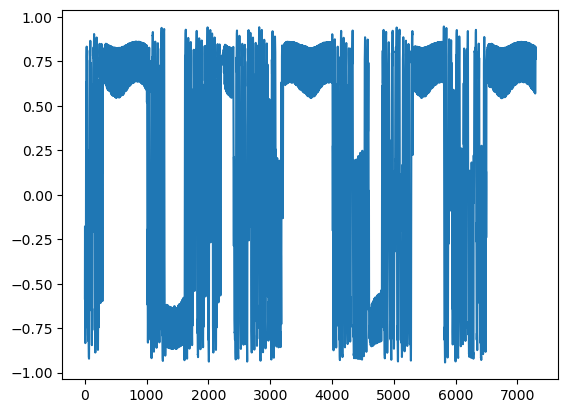

In [506]:
global_synchrony, global_mean_phase = network.get_global_parameters()
plt.figure()
print(global_synchrony.shape)
print(global_synchrony[0], global_synchrony[254], global_synchrony[-1])
training_data = np.asarray(network.training_data_history)
print(training_data.shape, training_data[0], training_data[254], training_data[-1])
node_history = np.asarray(network.node_states_history).T
print(node_history.shape, node_history[5,0], node_history[15,254], node_history[40,-1])
plt.plot(node_history[5,:])

In [507]:
#test_data = pd.read_csv("../data/thomas.csv",header=None)
test_data = pd.read_csv("../data/thomas_periodic_orbit.csv",header=None)
test_data = test_data.to_numpy().transpose()[1:,:-1] 

warmup_period = 1200
network.predict(test_data, warmup_time=warmup_period, freezing_time=warmup_period/2, prediction_time=test_data.shape[1]-warmup_period-1)
node_history, link_history, training_data, prediction_history = network.get_history()
global_synchrony, global_mean_phase = network.get_global_parameters()

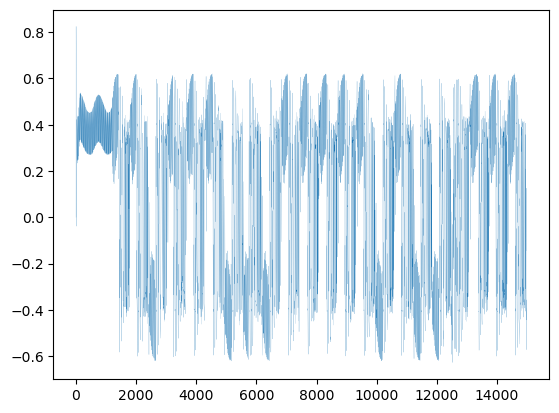

In [508]:
plt.plot(node_history[0, :], linewidth=0.1)

(15000,)


(0.0, 1.0)

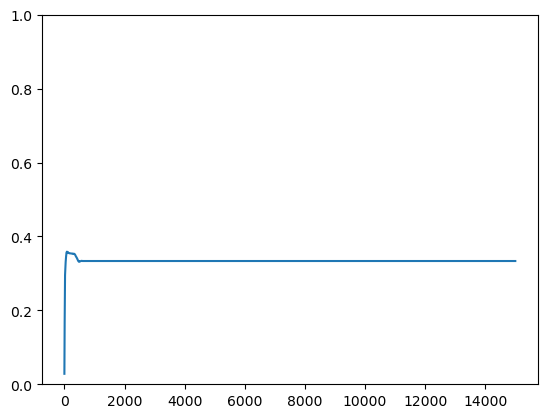

In [509]:
plt.plot(global_synchrony)
print(global_synchrony.shape)
plt.ylim(0, 1)

test data:  (3, 15000)
nodes:  (100, 15000)
training:  (3, 22299)
pred:  (3, 15000)


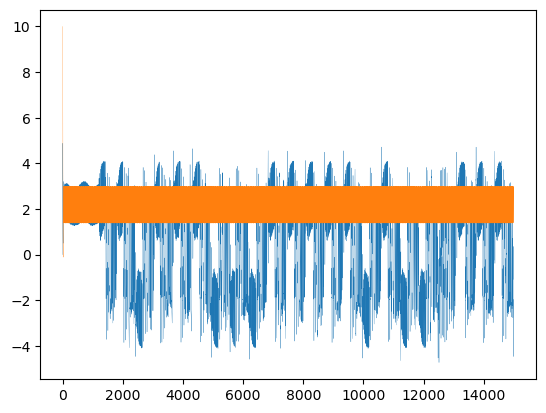

In [510]:
print("test data: ", test_data.shape)
print("nodes: ", node_history.shape)
print("training: ", training_data.shape)
print("pred: ", prediction_history.shape)
plt.plot(prediction_history[0,:], linewidth=0.2)
plt.plot(test_data[0,:], linewidth=0.2)

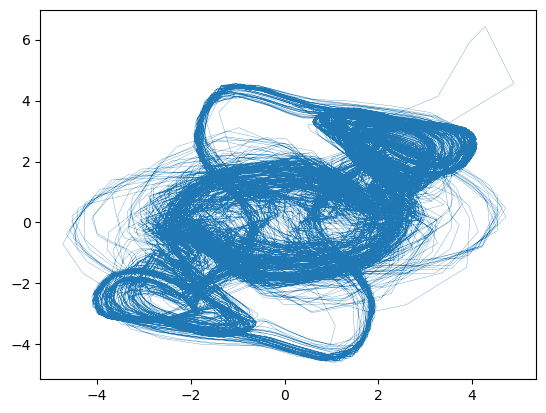

In [511]:
"""
View the 2D phase portrait
"""
plt.plot(prediction_history[0],prediction_history[1],linewidth=.2)

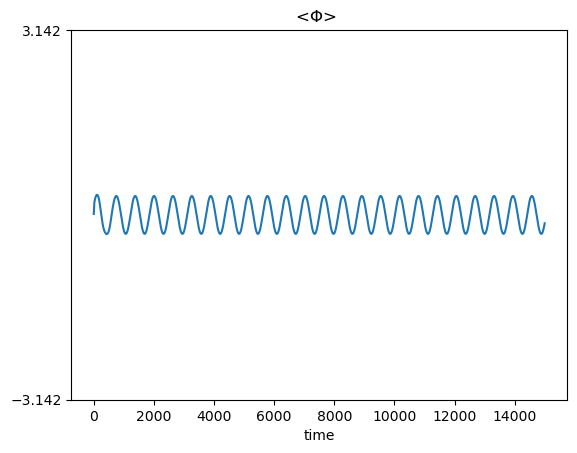

In [512]:
plt.plot(global_mean_phase)
plt.title("<Φ> ")
plt.xlabel("time")
plt.yticks([-np.pi,np.pi]);

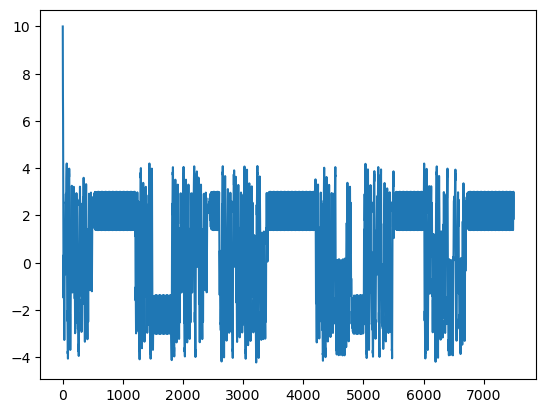

In [513]:
plt.plot(train_input[0,:])

In [514]:
import sys
np.set_printoptions(threshold=sys.maxsize)
print(network.output_weights)

[[-2.03060316e-02 -2.56026264e+00 -9.89960734e-01  4.57998462e+00
   1.15482192e-01  4.07962889e+00 -5.48660439e-01  1.72766740e+00
   6.09331945e-01 -1.48946737e+00 -1.95690159e+00  1.44635497e+00
  -9.42030539e-02 -1.48766721e+00 -2.23862489e-01 -3.22313013e+00
   2.94830967e-01 -2.69496759e-01 -1.20658966e+00 -2.12510917e+00
  -3.88676671e-01 -2.39730986e+00  1.63173613e-01  8.20230991e-01
  -5.71711813e-02  8.27516775e-01 -3.31443268e+00  1.55975666e-01
  -7.95440808e-01 -4.10077206e-01  1.61830506e+00 -4.97975137e-01
  -1.63899543e+00  1.34473044e+00 -1.51495710e-01  9.92949380e-01
   2.68212724e-01 -5.53499745e-01 -4.03973987e-01 -2.68472758e-02
   4.18733616e-01  1.65979373e+00 -4.46753026e-01 -1.32996926e-01
  -2.53329217e-01 -1.12705835e+00 -1.48101334e+00  9.02473805e-01
  -1.78728725e-01  5.33683961e-01 -4.89421155e-02  1.40870984e+00
  -4.75509794e-01  1.45585253e+00  1.36016177e+00 -1.76812465e-01
   8.06787385e-01 -2.17369288e+00 -2.65442880e+00 -2.19082068e+00
   2.93675